# 머신러닝(①선형회귀와 경사하강법)

> 이미지 출처 : deeplearning.ai

우리는 컴퓨터나 모바일 등 디바이스를 다루면서 알게모르게 머신러닝 기술을 접합니다.

"초밥 직접 만들기"를 검색하거나 구글 검색엔진을 활용할 때 머신러닝 소프트웨어가 내부적으로 웹페이지 검색결과를 출력해줍니다.

구글 포토에서 동일인물로 묶어 사진을 그룹화해주기도 하지요. 이것도 머신러닝입니다. 넷플릭스에서 내 선호도를 파악해서 재미있어 할 만한 영화를 추천해주는 것, 음성으로 카톡을 보내거나 카카오내비 목적지를 입력하는 것, 스팸메일을 걸러주는 것. 이제는 우리가 인지하지 못하는 곳곳에도 머신러닝 기능이 깔려 있습니다.

컴퓨터 비전 기술로 반도체 불량을 인식해 내거나, 엑스레이 사진으로 종양이나 질병을 판독해 내는 기술도요.

이번 시간에는 머신러닝, 특히 가장 기초가 되는 선형회귀와 경사하강법을 이해하고, 파이썬으로 간단한 예제를 코드로 구현해본 후에, 사이킷런 라이브러리를 사용해서 간편하게 머신러닝 프로그램을 만들어보겠습니다.

# 머신러닝이 많이 쓰이는 이유?

예전에는, 그리고 현재에도 물론 프로그래밍 코드로 일일이 컴퓨터를 조작하고 프로그램을 만들어 왔습니다. 차량의 내비를 켜서 목적지까지 안내를 해달라고 할 때, 프로그램은 내부적으로 최단경로나 최적경로를 복잡하게 계산해서 최선의 경로를 도출해줍니다. 굉장히 똑똑하고요.

그런데 검색엔진은 불과 몇 년 전만 해도 최적의 웹페이지를 검색해주는 데 한계가 있었습니다. 사람의 음성을 텍스트로 인식하는 것도 거의 불가능했고, 번역의 품질은 굉장히 떨어졌으며, 자율주행차나 이족보행 로봇은 꿈만 같은 기술이었습니다.

2022년 현재에는 상기한 모든 기술이 완벽에 가깝게 구현되고 있습니다. 머신러닝을 통해서요. 그 뿐 아니라 농업, 헬스케어, 이커머스나 다양한 분야에 머신러닝을 적용하게 되었습니다. 여기서 머신러닝을 간단히 정의해보면 "컴퓨터가 특정 코드로 짜인 프로그램을 수행하는 것이 아니라 학습능력을 갖게 하는 기술(Field of study that gives computers the ability to learn without being explicitly programmed. by Arthur Samuel(1959))입니다.

물론 여전히 영화 속의 자비스 같은 똑똑한 인공지능을 만드는 것은 아직 꿈 같은 일입니다. 하지만 AI를 연구하는 대부분의 과학자들은 사람의 뇌와, 컴퓨터의 학습방법을 지속적으로 연구하다 보면 어느 정도 실마리가 나올 것으로 생각하고 있습니다. 머신러닝 기술의 발전도굉장히 빠르고요. 2020년도 매킨지 보고서에 따르면 2030년도에는 머신러닝 기술로 매년 최소 13조달러(1.6경원) 이상의 부가가치가 창출될 것으로 조사되었습니다.

# 머신러닝의 종류

머신러닝은 현재도 계속해서 다양한 알고리즘이 개발되고 있습니다. 그럼에도 모든 머신러닝 알고리즘이 가지고 있는 동일한 특징이 있습니다.

> 아더 사무엘이라는 과학자는 1950년도에 컴퓨터가 체커 게임을 플레이하면서 스스로 배우는 프로그램을 제작했습니다. 재미있는 점은 아더사무엘 자신은 체커 게임을 잘 하지 못한다는 점이었습니다. 수만 번 플레이한 후에야 비로소 컴퓨터가 사람의 수준으로 플레이할 수 있었습니다.

만약 컴퓨터에게 학습기회를 아주 조금만(100~1,000회?) 플레이하게 했다면 프로그램 성능은 어땠을까요? 훨씬 떨어졌을 것입니다. **요점은 "컴퓨터가 수많은 플레이를 통해 점진적인 학습을 한다"는 점이고 이것이 머신러닝의 모든 알고리즘에 적용되는 핵심개념입니다.**

머신러닝의 여러 알고리즘은 크게 둘로 분류해보면,

1. 지도학습 Supervised Learning
2. 비지도학습 UnSupervised Learning

지도학습과 비지도학습으로 나눌 수 있습니다. (우리는 지도학습을 먼저 배우겠습니다.)

# 지도학습 Supervised Learning

지도학습은 현재 다양한 어플리케이션과 프로그램에서 가장 많이 사용되는(99% 이상) 학습기법으로, 기술적으로도 다양한 연구가 진행되고 있어, 가장 빠른 발전을 이루고 있는 분야입니다. 이번 시간에는 지도학습에 대해 간단히 알아보겠습니다.


# 지도학습의 개념

지도학습의 핵심 개념은,

X라는 입력과 Y라는 출력을 컴퓨터에게 보여주고, 컴퓨터는 이를 통해 일종의 "모델(함수)"을 만든다는 것입니다.

![](https://imgdb.in/k67G.jpg)

---

## 간단한 예 : 회귀와 분류

![](https://imgdb.in/k67H.png)

집의 면적에 따른 집값의 그래프가 위와 같다고 할 때
우리는 아래와 같이 어느 정도 추세를 파악합니다.

![](https://imgdb.in/k67I.jpg)

컴퓨터 스스로 이런 예측을 할 수 있게 만드는 모델이 바로 "회귀 Regression"입니다. 이 모델의 출력은 집값을 나타내는 "숫자"가 될 것입니다.

이런 예제도 있습니다.

![](https://imgdb.in/k67L.jpg)

이런 경우에 모델의 출력은 카테고리 중 하나(양성, 음성)가 될 것입니다.

![](https://imgdb.in/k67O.jpg)

위와 같이 오차를 최소화하는 경계선을 찾는 일을 하겠지요. 이런 식으로 사진에서 강아지와 고양이를 구분하거나, 특정 질병의 진행 정도가 10단계 중 어느 단계인지 구분할 수 있습니다.

이밖에도 비지도학습, 강화학습, 적대적 생성 신경망 등 다양한 알고리즘이 개발되고 있으며 이 부분은 다음에 다루도록 하겠습니다. 그럼 이제 좀 더 구체적으로 회귀에 대해서 배워보도록 하겠습니다.

# 지도학습 - 선형회귀

아래는 포틀랜드 집값에 대한 데이터셋입니다. (출처-캐글)



In [23]:
import pandas as pd

df = pd.read_csv("./houseprice.csv")
df.drop("no_rooms",axis=1, inplace=True)
df

,size,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900
5,1985,299900
6,1534,314900
7,1427,198999
8,1380,212000
9,1494,242500


데이터셋을 보면 47개의 행과 2개의 열로 구성되어 있습니다. 사이즈가 $2,104ft^2$이면 가격은 약 40만불 정도가 되네요.

<AxesSubplot:xlabel='size', ylabel='price'>

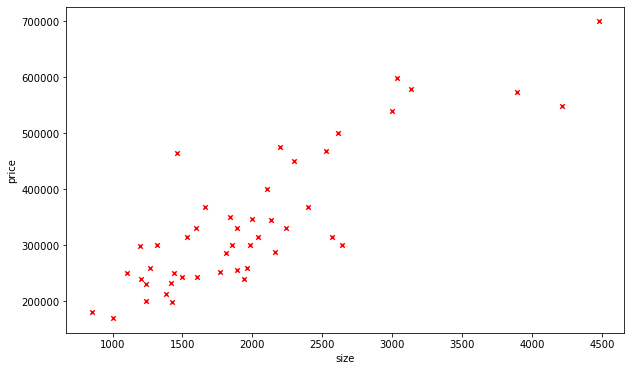

In [24]:
df.plot.scatter(x="size", y="price", marker="x", c="red", figsize=(10,6))

# 용어 정리1

이 데이터셋으로 선형회귀를 진행하기 전에 몇 가지 용어와 표현방법을 먼저 정리하겠습니다.

우리는 집의 사이즈를 입력값으로, 집의 가격을 출력해주는 모델을 만들고 싶습니다.

이 때 입력값(예:2,104$ft^2$)을 x라고 적고 "입력변수 input variable feature"라고 표현합니다.

반대로 출력되는 집값은 y라고 적고 "출력변수 output variable" 또는 "목표변수 target variable"라고 부릅니다.

관례적으로 데이터셋의 행 갯수는 m으로 표기하며, 한 개의 행을 표현할 때는 괄호를 사용하여 (x, y)로 적습니다. 그리고 이 둘을 통틀어 학습세트training set라고 부릅니다.

i번째 데이터를 나타내는 표기법은 아래와 같습니다.

$$(x^{(i)}, y^{(i)})$$

괄호가 들어있긴 하지만 위첨자이기 때문에 몇제곱 하는 식으로 해석하시면 안됩니다.

마지막으로 $\hat{y}$은 출력변수 y를 모델을 통해 예측한 값을 나타냅니다.

선형회귀 뿐만 아니라 딥러닝 등 머신러닝 분야에서 일반적으로 사용하는 표기법들이므로 익숙해지시기 바랍니다.

# 용어정리2

우리가 학습세트를 사용해서 본질적으로 얻고자 하는 것은 일종의 "함수"입니다. 머신러닝 분야에서는 좀 더 유식하게 표현하고자 이를 "가설Hypothesis"이라고도 부르지만, 우리 수업에서는 "함수" 또는 "모델"이라고 지칭하겠습니다. 그리고 수학 관례를 따라 해당 모델을 $f$로 부르겠습니다.

여기서 f는 어떤 형태일까요? 가장 기본이 되는 1차 선형회귀 모델을 예로 들면

$$f_{w,b}(x) = wx + b$$

가 될 것입니다. 여기서 w는 기울기, b는 y절편이지요. 수학시간에는 ax+b라는 식으로 많이 표현했지만, 앞으로는 관례에 따라 함수의 기울기를 weight의 w로, y절편을 bias의 b로 표현하겠습니다. f의 아래첨자인 w, b를 생략해도 의미는 동일한 것으로 간주합시다.

# 컴퓨터는 무엇을 학습할 것인가?

짐작하셨겠지만 우리는 컴퓨터로 하여금 데이터셋을 가장 적절히 표현하는 1차함수를 만들어내게 할 것입니다. 그 말인즉슨 y_hat과 y의 오차를 최소로 하는 w와 b를 찾아내게 하는 것입니다.

다양한 방법이 있을 수 있지만, 대중적으로 가장 많이 사용되는 방법은 바로 "비용함수Cost Function"인 J를 활용하는 것입니다.

> 용어나 표기법의 유래를 설명드리면 타래가 너무 길어집니다. 이 부분은 그런가보다 하고 너그러이 넘어가 주시기 바랍니다.

비용함수의 형태는 아래와 같습니다.

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

그리고 비용함수 안의 f는 위에서 설명드린 바와 같습니다.

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

표기는 다소 복잡해 보이지만 의미는 간단합니다.

바로 출력변수와 예측값의 차이(오차)를 최소화하는 것입니다.

비용함수는 이 오차를 정량화한 값이며, 이 경우에는 "평균제곱오차 Root Mean Square Error, RMSE"라는 비용함수를 사용했습니다.

# 우리의 목표는 비용함수를 최소화하는 것

아래의 그림(출처:Deeplearning.ai)을 자세히 읽어주시기 바랍니다.

![](https://imgdb.in/k685.jpg)

함수가 특정 상태에 도달했을 때, 비용함수가 최소화되는 점이 있습니다. (선형회귀에서는 식의 특성상 최소지점이 딱 한 개 있습니다.)

입력변수, 즉 특성이 두 개인 경우라면 아래와 같이 그려집니다. (이 경우에도 최소지점은 한 개입니다.)

![](https://imgdb.in/k68f.jpg)

수동으로 w와 b를 직접 바꿔 입력하면서 비용함수가 최소화되는 지점을 찾는 것은 아무래도 시간이 너무 많이 걸릴 것 같습니다. 컴퓨터가 이 지점을 자동으로 찾아갈 수 있도록 반복해서 학습시킨다면 문제가 해결될 것 같은데요. 어떤 방법을 사용하는 것이 좋을까요?

# 비용함수의 기울기를 사용해 보면 어떨까?

비용함수가 일종의 2차함수처럼 보이는데, 기울기를 사용하면 되지 않을까요? 그러면 미분으로 간단히 해결할 수 있겠네요. 한 점에서의 비용함수 기울기를 알려면 1차미분 후 x값을 입력하면 되겠죠?

이 때 사용하는 기법이 바로 **"경사하강법"**입니다.

마지막으로 경사하강법에 대해 알아보고 마치겠습니다.

# 경사하강법 Gradient Descent

경사하강법을 식으로 표현하면 아래와 같습니다. 경사하강법의 본질은 간단한 편미분식입니다.

![](https://imgdb.in/k68i.png)

여기서 알파는 학습률learning rate을 나타냅니다.

위 식의 편미분 부분을 풀어서 써보면 아래와 같습니다.

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})\\
\end{align}
$$

이 식이 어떻게 최적의 w와 b값을 찾아낼 수 있다는 걸까요?
아래 그림을 참고해 주시기 바랍니다.

![](https://imgdb.in/k68l.png)

# 학습률 alpha란?

우리는 컴퓨터에게 비용함수의 편미분 값을 통해 비용함수를 최소로 하는 w와 b를 찾게 하고 있습니다. 그런데 편미분값이 너무 작거나 너무 크다면 어떻게 될까요?

![](https://imgdb.in/k68n.png)

알파가 너무 작으면 비용함수의 최소값으로 이동하는 거리가 너무 작아서 필요 이상으로 연산을 많이 하게 되고,

반대로 알파가 너무 크면 한 걸음이 너무 커서 아래 그림처럼 발산해버리게 됩니다. (최소오차로 수렴해야 하는데요.)

# 중간정리

여기까지 머신러닝 중 지도학습의 대표적인 모델인 선형회귀의 알고리즘에 대해 간단히 알아보았습니다. 여기서 가장 중요한 개념 세 가지는 비용함수와 경사하강법, 그리고 학습률이었습니다. 이제 파이썬 코딩을 통해 위의 데이터셋에 맞는 선형회귀 모델을 한 번 만들어보도록 하겠습니다.

In [25]:
# 단일변수 선형회귀모델 구현



In [26]:
# scikit-learn 모듈을 통한 간편한 구현



# 마치며

여기까지 선형회귀에 대해 알아보았습니다. 실제 사례에서는 대부분 두 개 이상, (경우에 따라 수십 개 이상)의 특성을 입력변수로 활용하는 경우도 있는데, 이런 경우에는 특정 실수값이 아닌 벡터값을 사용하게 됩니다. 기본적인 개념을 이해하신 후에는 사이킷런이나 텐서플로 같은 파이썬 라이브러리를 활용해서 모델을 만들고 활용하실 것입니다.